<img src="../.images/logosnb.png" alt="Banner" style="width:1100px;"/>

<div style='color: #690027;' markdown="1">
    <h1>REGRESSIE MET DATA VAN DE MORTERATSCHGLETSJER</h1> 
</div>

<div class="alert alert-box alert-success">
In deze notebook leer je een puntenwolk maken van data uit een <em>csv-bestand</em>. Je leert ook hoe je met de ingebouwde functies in de Python-module scikit-learn de regressielijn kunt bepalen.
</div>

Sinds de industriële revolutie is de concentratie broeikasgassen in de atmosfeer stelselmatig toegenomen. Sinds 1880 is de gemiddelde globale temperatuur ongeveer met 0,85 °C gestegen. Deze opwarming gaat gepaard met een opwarming van de oceanen, een stijging van het zeeniveau met 20 cm, het meer voorkomen van extreme weersomstandigheden en een afname van 40 % van het Arctische zee-ijs. Ook het gletsjerijs smelt, bijna overal ter wereld.<br><br>
Het smeltwater afkomstig van gebergtegletsjers zal in belangrijke mate bepalen hoeveel het zeeniveau in de toekomst zal stijgen. Mogelijke scenario's spreken van een stijging tot 30 cm door het afsmelten van de gebergtegletsjers. <br>
Bovendien hebben gletsjers een impact op lokale watervoorraden en zijn ze belangrijk voor het toerisme.<br>
De snelheid waarmee het volume van een gletsjer afneemt o.i.v. de globale temperatuurstijging verschilt van gletsjer tot gletsjer. Lokale factoren spelen hierin immers een rol: bv. de oriëntatie van de gletsjer, de mate waarin de gletsjer in de schaduw ligt ... [1]. 

De 6 km lange Morteratschgletsjer bevindt zich in Zwitserland en ligt een groot deel van het jaar in de schaduw van de omringende bergtoppen [1]. 

<img src="../.images/IntroductiePython/Morteratsch2018_lvt.JPG" alt="Banner" style="width:600px;"/>
<center> Foto: Morteratsch 2018, &copy; Lander Van Tricht.</center>

Lander Van Tricht (VUB) verschafte ons data van zijn onderzoek naar hoe de Morteratschgletsjer evolueert. Sinds 1880 werd geregistreerd hoeveel meter de gletsjer jaarlijks terugtrekt [2]. 

### De nodige modules importeren

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

In [2]:
morteratsch = pd.read_csv("../.data/IntroductieMachineLearning/Morteratsch.dat")

In [3]:
morteratsch.head()       # begin van tabel

,gletsjer,jaartal,terugtrekking (m)
0,MORTERATSCH,1880,100
1,MORTERATSCH,1881,41
2,MORTERATSCH,1883,16
3,MORTERATSCH,1885,24
4,MORTERATSCH,1886,12


In [4]:
morteratsch.tail()

,gletsjer,jaartal,terugtrekking (m)
126,MORTERATSCH,2014,22
127,MORTERATSCH,2015,164
128,MORTERATSCH,2016,70
129,MORTERATSCH,2017,70
130,MORTERATSCH,2018,135


In [5]:
# tabel met 131 rijen en 3 kolommen
# eerste kolom bevat naam van de gletsjer
# tweede kolom komt overeen met jaartal van de meting, derde met terugtrekking van de gletsjer in meter
# je werkt met tweede en derde kolom van de tabel

In [6]:
x = morteratsch["jaartal"]    # hoofding van kolom "jaar" speelt rol van index
y = morteratsch["terugtrekking (m)"]

In [7]:
# data omzetten naar geschikt formaat voor machine learning
x = np.array(x)
y = np.array(y)
print(x)
print(y)

[1880 1881 1883 1885 1886 1887 1888 1889 1890 1891 1892 1893 1895 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
[100  41  16  24  12  20  38  14  18  18  10  24  12  37  12  -2   5   9
   8   6   6   0   3   7  20  30   9  20  -5  10  12   6  10   5  16   6
   9  10  12   6   9   9   8  11  11  12  15   4  15  14   7  12  26  34
  42  22  22  20  34  22  20  48  12  19  20  26  48  36  16  20  31  46
  39  35  33  45  38  44  38  41  31   5  

<div style='color: #690027;' markdown="1">
    <h2>2. Data weergeven in puntenwolk</h2> 
</div>

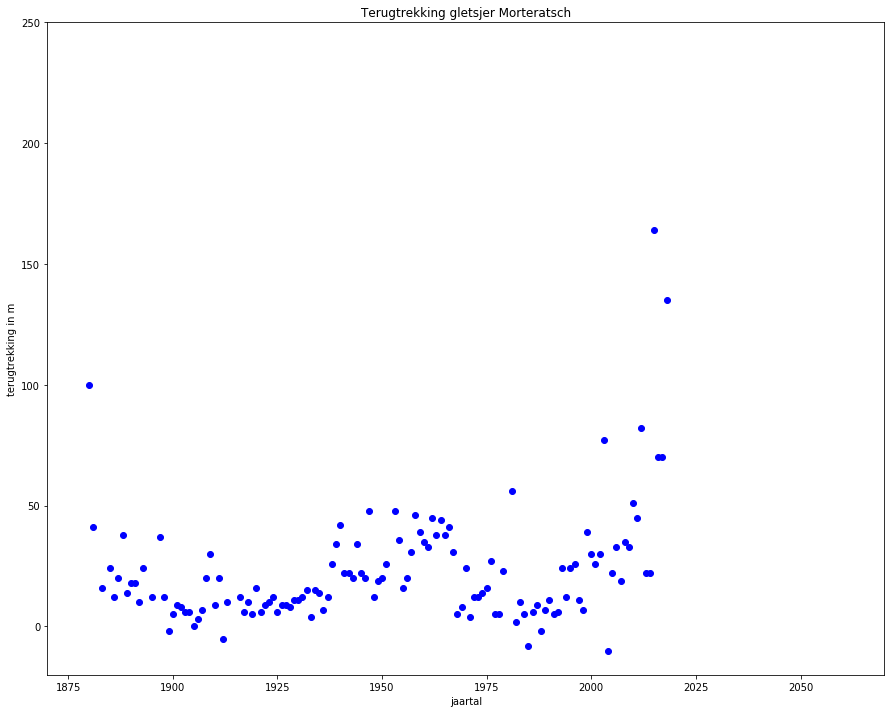

In [8]:
plt.figure(figsize=(15,12))    # om een grotere grafiek te krijgen, zodat punten meer verspreid

plt.scatter(x, y, color="blue", marker="o")

plt.xlim(1870, 2070)
plt.ylim(-20, 250)
plt.title("Terugtrekking gletsjer Morteratsch")
plt.xlabel("jaartal")
plt.ylabel("terugtrekking in m")

plt.show()

De data van de laatste jaren wijkt af van de trend. De gletsjer is veel meer teruggetrokken dan in de jaren ervoor. <br>
In 1880 was de gletsjer ook fel teruggetrokken. Is dat toen ook enkele jaren op rij zo geweest?

Antwoord:

<div style='color: #690027;' markdown="1">
    <h2>3. Samenhang tussen jaartal en terugtrekking?</h2> 
</div>

In [9]:
# in hoeverre is er een verband tussen jaartal en terugtrekking van de gletsjer? 
# correlatiecoëfficiënt bepalen (ligt tussen -1 en 1, hoe dichter bij 0, hoe slechter de samenhang)
np.corrcoef(x, y)[0,1]

0.30264286815987407

Wat is juist: zwakke/matige/sterke positieve/negatieve samenhang?

Antwoord:

<div class="alert alert-block alert-warning"> 
Meer uitleg over de correlatiecoëfficiënt vind je in de notebook 'Standaardiseren'.
</div>

<div style='color: #690027;' markdown="1">
    <h2>4. Onderzoek naar trend terugtrekking van de gletsjer met training- en testdata</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>4.1 Trainingdata en testdata</h3> 
</div>

We splitsen de data op in trainingdata en testdata.<br> *De trainingdata worden gebruikt om een wiskundig model op te stellen. <br>Met de testdata wordt nagegaan of het model goed omgaat met nieuwe data.* Omdat tijd hier een rol speelt, worden de laatste data als testdata gebruikt. Men wil immers nagaan of het model generaliseert naar de toekomst toe. 

In [10]:
# De data voorbereiden

# trainingdata
x_train = x[:101]
y_train = y[:101]
print(x_train)
print(y_train)

# testdata
x_test = x[101:]
y_test = y[101:]
print(x_test)
print(y_test)

[1880 1881 1883 1885 1886 1887 1888 1889 1890 1891 1892 1893 1895 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1981 1982 1983 1984 1985
 1986 1987 1988]
[100  41  16  24  12  20  38  14  18  18  10  24  12  37  12  -2   5   9
   8   6   6   0   3   7  20  30   9  20  -5  10  12   6  10   5  16   6
   9  10  12   6   9   9   8  11  11  12  15   4  15  14   7  12  26  34
  42  22  22  20  34  22  20  48  12  19  20  26  48  36  16  20  31  46
  39  35  33  45  38  44  38  41  31   5   8  24   4  12  12  14  16  27
   5   5  23  56   2  10   5  -8   6   9  -2]
[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 200

<div style='color: #690027;' markdown="1">
    <h3>4.2 Standaardiseren</h3> 
</div>

De data worden als volgt **gestandaardiseerd**: <br> Van elk gegeven uit de trainingdata wordt het gemiddelde afgetrokken en vervolgens wordt het resultaat gedeeld door de standaardafwijking. Men berekent m.a.w. van alle trainingdata de Z-score. <br>
De testdata wordt op dezelfde manier gestandaardiseerd, dus ook met het gemiddelde en de standaardafwijking van de trainingdata.

<div class="alert alert-block alert-warning"> 
Meer uitleg over standaardiseren vind je in de notebook 'Standaardiseren'.
</div>

In [11]:
# gemiddelde en standaardafwijking van de trainingdata bepalen
x_train_gem = np.mean(x_train)
x_train_std = np.std(x_train)
y_train_gem = np.mean(y_train)
y_train_std = np.std(y_train)

In [12]:
# gemiddelde en standaardafwijking van de trainingdata bepalen
x_train_gem = np.mean(x_train)
x_train_std = np.std(x_train)
y_train_gem = np.mean(y_train)
y_train_std = np.std(y_train)

# trainingdata standaardiseren
x_train = (x_train - x_train_gem) / x_train_std
y_train = (y_train - y_train_gem) / y_train_std

# testdata standaardiseren om te kunnen gebruiken in het model
x_test = (x_test - x_train_gem) / x_train_std
y_test = (y_test - y_train_gem) / y_train_std

<div style='color: #690027;' markdown="1">
    <h3>4.3 Regressielijn bepalen</h3> 
</div>

In [13]:
# gewenste formaat
X_train = x_train[:, np.newaxis]   
X_test = x_test[:, np.newaxis]

In [15]:
# lineaire regressie
regressielijn = LinearRegression()
regressielijn.fit(X_train,y_train)

print("Gemiddelde kwadratische afwijking voor de regressielijn m.b.t. de trainingdata: %.2f" % mean_squared_error(y_train, regressielijn.predict(X_train)))

plt.show()

Gemiddelde kwadratische afwijking voor de regressielijn m.b.t. de trainingdata: 1.00


<div style='color: #690027;' markdown="1">
    <h3>4.4 Regressielijn plotten</h3> 
</div>

Gemiddelde kwadratische afwijking voor de regressielijn m.b.t. de testdata: 6.88


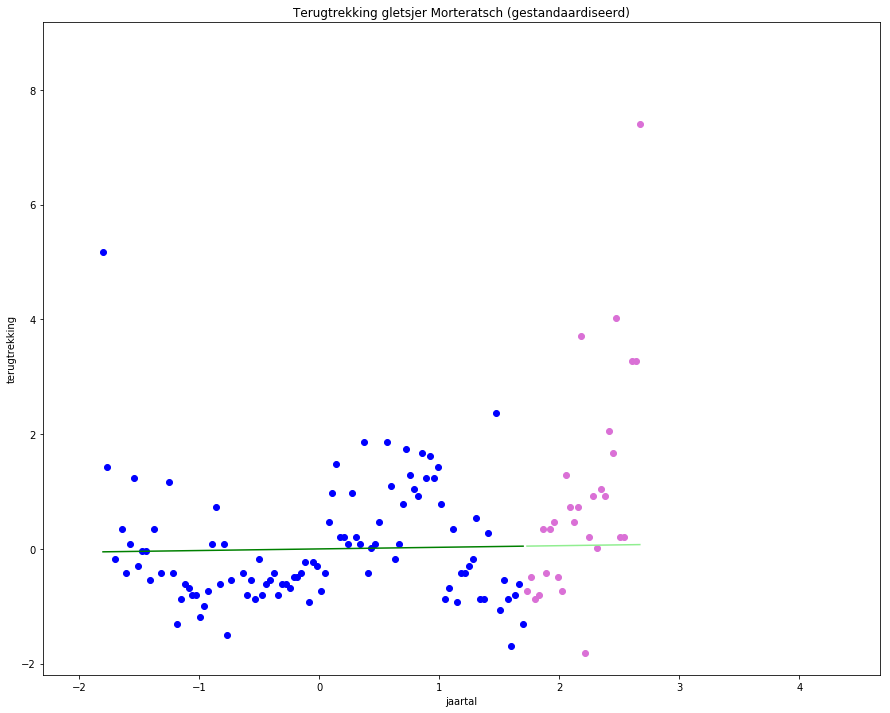

In [17]:
plt.figure(figsize=(15,12))

# trainingdata
plt.scatter(X_train, y_train, color="blue", marker="o")
plt.plot(X_train, regressielijn.predict(X_train), color="green")
# testdata
plt.scatter(X_test, y_test, color="orchid", marker="o")
plt.plot(X_test, regressielijn.predict(X_test), color="lightgreen")

plt.xlim(x_train.min()-0.5, x_test.max()+2)
plt.ylim(y_train.min()-0.5, y_train.max()+4)
plt.title("Terugtrekking gletsjer Morteratsch (gestandaardiseerd)")
plt.xlabel("jaartal")
plt.ylabel("terugtrekking")

print("Gemiddelde kwadratische afwijking voor de regressielijn m.b.t. de testdata: %.2f" % mean_squared_error(y_test, regressielijn.predict(X_test)))

plt.show()

In [19]:
# vergelijking van de rechte
print("De vergelijking van de rechte: y =", regressielijn.coef_[0], "x +", regressielijn.intercept_)

De vergelijking van de rechte: y = 0.028168491778529245 x + -1.3221773044404021e-17


In [24]:
# vergelijking van de rechte zonder standaardisatie
print("De vergelijking van de rechte: y =", 
      regressielijn.coef_[0] * y_train_std / x_train_std, "x +", 
      regressielijn.intercept_ * y_train_std + y_train_gem - regressielijn.coef_[0] * x_train_gem * y_train_std / x_train_std)

De vergelijking van de rechte: y = 0.014349795072014991 x + -9.140862265674642


<div>
    <h2>Referentielijst</h2> 
</div>

[1] Zekollari, H., Fürst, J. J., & Huybrechts, P. (2014). Modelling the evolution of Vadret da Morteratsch, Switzerland, since the little ice age and into the future.<br>&nbsp; &nbsp; &nbsp; &nbsp; *Journal of Glaciology*.60, 244. doi:10.3189/2014JoG14J053.<br>
[2] Van Tricht, L. (2019). Via e-mail. 

<img src="../.images/cclic.png" alt="Banner" align="left" style="width:100px;"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 